In [1]:
import os
import sys
import glob 
from functools import reduce
import seaborn as sb
import pandas as pd
import random

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
sys.path.append("../")
from simulation.cloud import *
from simulation.data import *
from simulation.plot import *
from simulation.log import *
from simulation.utils import plot_ecdf, ecdf

In [4]:
NUM_LEAFS = 576
NUM_HOSTS_PER_LEAF = 48
NUM_RULES_PER_LEAF = 10000
MAX_VMS_PER_HOST = 20
NUM_TENANTS = 3000
MIN_VMS_PER_TENANT = 10
MAX_VMS_PER_TENANT = 5000
VM_DIST = "expon"  # options: expon
NUM_GROUPS = 100000
MIN_GROUP_SIZE = 5
GROUP_SIZE_DIST = "wve"  # options: uniform and wve
PLACEMENT_DIST = "colocate-random-linear"  # options: uniform, colocate-random-linear, and colocate-random-random
COLOCATE_NUM_HOSTS_PER_LEAF = 48
NUM_BITMAPS = 10
MAX_BATCH_SIZE = 1
SEED = 0

In [5]:
random.seed(SEED)

cloud = Cloud(num_leafs=NUM_LEAFS,
              num_hosts_per_leaf=NUM_HOSTS_PER_LEAF,
              num_rules_per_leaf=NUM_RULES_PER_LEAF,
              max_vms_per_host=MAX_VMS_PER_HOST,
              num_tenants=NUM_TENANTS,
              min_vms_per_tenant=MIN_VMS_PER_TENANT,
              max_vms_per_tenant=MAX_VMS_PER_TENANT,
              vm_dist=VM_DIST,  # options: expon
              num_groups=NUM_GROUPS,
              min_group_size=MIN_GROUP_SIZE,
              group_size_dist=GROUP_SIZE_DIST,  # options: uniform and wve
              placement_dist=PLACEMENT_DIST,  # options: uniform, colocate-random-linear, and colocate-random-random
              colocate_num_hosts_per_leaf=COLOCATE_NUM_HOSTS_PER_LEAF,
              num_bitmaps=NUM_BITMAPS,
              max_batch_size=MAX_BATCH_SIZE)

network[leaf_to_hosts]: initialized.
network[host_to_leaf]: initialized.
tenants[vm_count]: initialized.
tenants[group_count]: initialized.
tenants[groups_to_sizes]: initialized.
tenants[groups_to_vms]: initialized.
placement[tenant_vms_to_host]: initialized.
placement[tenant_vms_to_leaf]: initialized.
placement[tenant_groups_to_leafs_and_count]: initialized.
placement[tenant_groups_leafs_to_hosts_and_bitmap]: initialized.
optimization: complete.


In [6]:
data = Data(cloud)

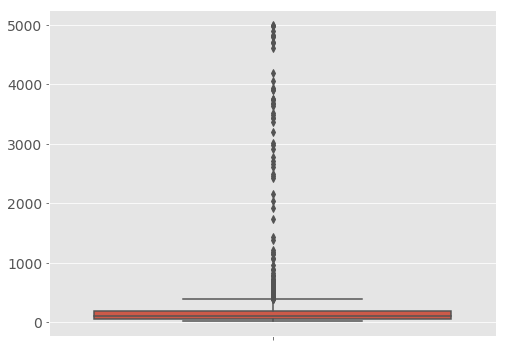

In [7]:
sb.boxplot(y=data.vm_count_for_all_tenants())

In [8]:
sum(data.vm_count_for_all_tenants())

543464

In [9]:
# sb.kdeplot(data.vm_count_for_all_tenants(), cumulative=True)

In [10]:
data.vm_count_for_all_tenants().describe()

count    3000.000000
mean      181.154667
std       433.082649
min        10.000000
25%        46.000000
50%        98.000000
75%       184.000000
max      4999.000000
dtype: float64

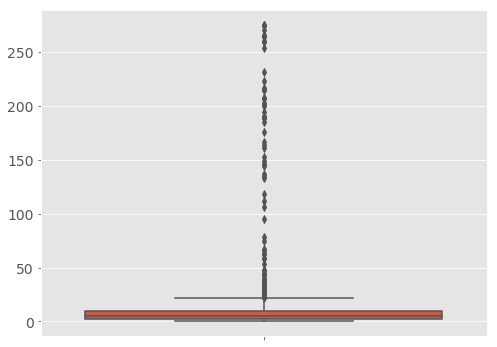

In [11]:
sb.boxplot(y=data.group_count_for_all_tenants())

In [12]:
# sb.kdeplot(data.group_count_for_all_tenants(), cumulative=True)

In [13]:
data.group_count_for_all_tenants().describe()

count    3000.000000
mean        9.482333
std        23.909933
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max       275.000000
dtype: float64

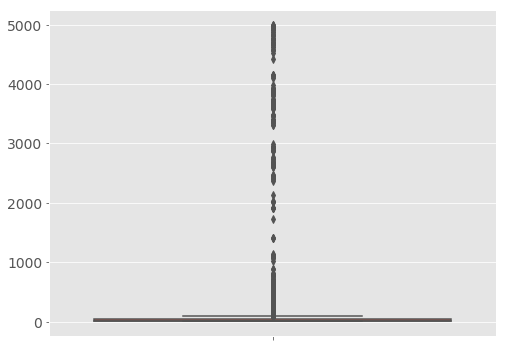

In [14]:
sb.boxplot(y=data.group_sizes_for_all_tenants())

In [15]:
# sb.kdeplot(data.group_sizes_for_all_tenants(), cumulative=True)

In [16]:
data.group_sizes_for_all_tenants().describe()

count    28447.000000
mean        61.028615
std        275.601647
min          5.000000
25%          7.000000
50%         12.000000
75%         45.000000
max       4993.000000
dtype: float64

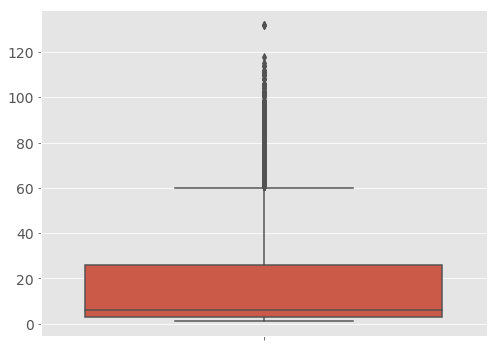

In [17]:
sb.boxplot(y=data.leafs_for_all_groups_in_all_tenants())

In [18]:
# sb.kdeplot(data.leafs_for_all_groups_in_all_tenants(), cumulative=True)

In [19]:
data.leafs_for_all_groups_in_all_tenants().describe()

count    28447.000000
mean        17.964038
std         23.311567
min          1.000000
25%          3.000000
50%          6.000000
75%         26.000000
max        132.000000
dtype: float64

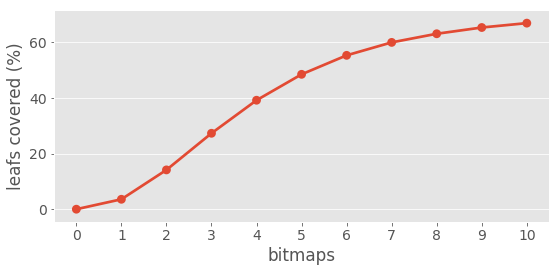

In [20]:
plot_data = pd.DataFrame()

plot_data['bitmaps'] = [i for i in range(0, NUM_BITMAPS + 1)]
plot_data['leafs covered (%)'] = data.percentage_of_groups_covered_with_varying_bitmaps(NUM_BITMAPS)

sb.factorplot(x='bitmaps', y='leafs covered (%)', data=plot_data, size=4, aspect=2)

In [21]:
data.percentage_of_groups_covered_with_varying_bitmaps(NUM_BITMAPS).describe()

count    11.000000
mean     40.292474
std      25.217363
min       0.000000
25%      20.713959
50%      48.486659
75%      61.519668
max      66.889303
dtype: float64

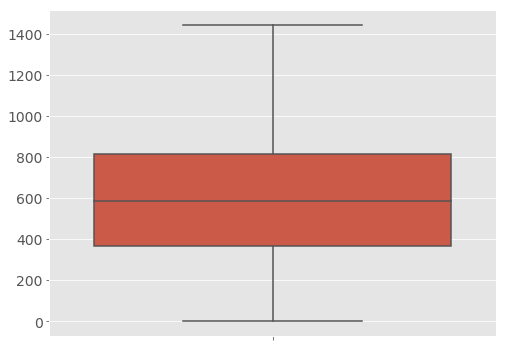

In [22]:
sb.boxplot(y=data.rules_for_all_leafs_pre_optimization())

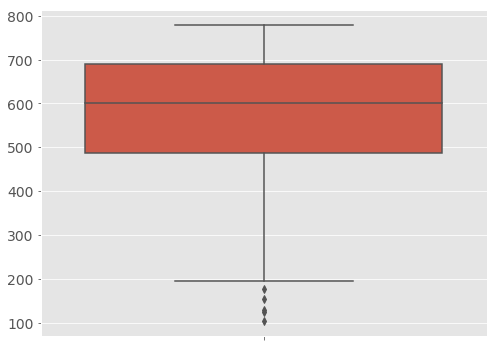

In [23]:
sb.boxplot(y=data.rules_for_all_leafs_post_optimization())

In [24]:
len(data.rules_for_all_leafs_post_optimization())

576

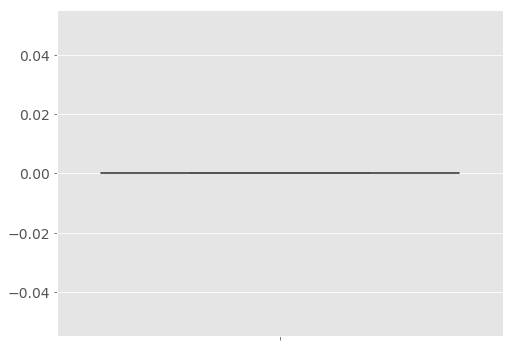

In [25]:
sb.boxplot(y=data.redundancy_for_all_groups_in_all_tenants())

In [13]:
# data.rules_for_all_groups_pre_optimization().describe()

In [14]:
# data.rules_for_all_groups_post_optimization().describe()